# Lab 03: Adults and Pandas

### Author: Jack Stoetzel [jstoetzel1@gulls.salisbury.edu]

### Date: October 01, 2020

### Objectives:
1. Practice efficiently manipulating data with Python 
2. Use the `matplotlib`, `pandas` libraries
3. Gain familiarity with data import and plotting

In [1]:
import pandas as pd
import pylab as pl

In [2]:
# Read the data into a pandas DataFrame object.

adults = pd.read_csv('./adult.data',
                      header=None,
                      skipinitialspace=True,
                      names=[
                             'age', 'workclass', 'fnlwgt', 'education',
                             'education-num', 'marital-status', 
                             'occupation', 'relationship', 'race',
                             'sex', 'capital-gain', 'capital-loss',
                             'hours-per-week', 'native-country', 'income'
                            ]
                     )

adults

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
# Rank each occupation in terms of most likely to earn more than $50k.

occ_inc = adults[['occupation', 'income']]
occ_gt50 = occ_inc[occ_inc['income'] == '>50K'].groupby('occupation').count()
occ_le50 = occ_inc[occ_inc['income'] == '<=50K'].groupby('occupation').count()

percent_gt50 = occ_gt50 / (occ_gt50 + occ_le50)
percent_gt50.sort_values(by='income', ascending=False).round(2)

,income
occupation,
Exec-managerial,0.48
Prof-specialty,0.45
Protective-serv,0.33
Tech-support,0.30
Sales,0.27
Craft-repair,0.23
Transport-moving,0.20
Adm-clerical,0.13
Machine-op-inspct,0.12


In [4]:
# Calculate the median age of people who make more and less than $50k. Calculate the medians for each again, 
# but now split apart by the sex of the adults.

age_inc = adults[['age', 'income']]

median = age_inc[age_inc['income'] == '<=50K'].sort_values(by='age', ascending=True).median()['age']
print(f"The median age for adults who make $50,000 or less is {median}")

median = age_inc[age_inc['income'] == '>50K'].sort_values(by='age', ascending=True).median()['age']
print(f"The median age for adults who make over $50,000 is {median}")
print()

sex_age_inc = adults[['sex', 'age', 'income']]

female_age_inc = sex_age_inc[sex_age_inc['sex'] == 'Female']

median = female_age_inc[female_age_inc['income'] == '<=50K'].sort_values(by='age', ascending=True).median()['age']
print(f"The median age for female adults who make $50,000 or less is {median}")

median = female_age_inc[female_age_inc['income'] == '>50K'].sort_values(by='age', ascending=True).median()['age']
print(f"The median age for female adults who make over $50,000 is {median}")
print()

male_age_inc = sex_age_inc[sex_age_inc['sex'] == 'Male']

median = male_age_inc[male_age_inc['income'] == '<=50K'].sort_values(by='age', ascending=True).median()['age']
print(f"The median age for male adults who make $50,000 or less is {median}")

median = male_age_inc[male_age_inc['income'] == '>50K'].sort_values(by='age', ascending=True).median()['age']
print(f"The median age for male adults who make over $50,000 is {median}")

The median age for adults who make $50,000 or less is 34.0
The median age for adults who make over $50,000 is 44.0

The median age for female adults who make $50,000 or less is 34.0
The median age for female adults who make over $50,000 is 41.0

The median age for male adults who make $50,000 or less is 35.0
The median age for male adults who make over $50,000 is 44.0


In [5]:
# Calculate the mean and median number of years of education held by adults who make more and less than $50k.

edu_inc = adults[['education-num', 'income']]

median = edu_inc[edu_inc['income'] == '<=50K'].sort_values('education-num', ascending=True).median()['education-num']
mean = edu_inc[edu_inc['income'] == '<=50K'].sort_values('education-num', ascending=True).mean()['education-num']
print(f"The mean education for adults who make $50,000 or less is {mean:.2} years and the medain is {median} years.")
print()

median = edu_inc[edu_inc['income'] == '>50K'].sort_values('education-num', ascending=True).median()['education-num']
mean = edu_inc[edu_inc['income'] == '>50K'].sort_values('education-num', ascending=True).mean()['education-num']
print(f"The mean education for adults who make over $50,000 is {mean:.3} years and the medain is {median} years.")

The mean education for adults who make $50,000 or less is 9.6 years and the medain is 9.0 years.

The mean education for adults who make over $50,000 is 11.6 years and the medain is 12.0 years.


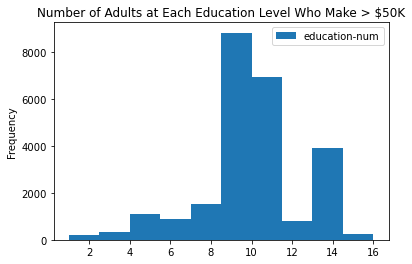

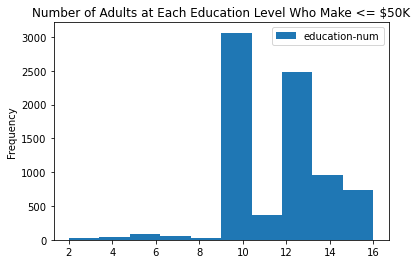

In [6]:
# Plot a histogram to see the distribution of years of school held by adults who make more and less than $50k.

edu_inc = adults[['education-num', 'income']]

edu_le50 = edu_inc[edu_inc['income'] == '<=50K'].sort_values('education-num', ascending=True)
edu_le50.plot.hist(title="Number of Adults at Each Education Level Who Make > $50K")

edu_gt50 = edu_inc[edu_inc['income'] == '>50K'].sort_values('education-num', ascending=True)
edu_gt50.plot.hist(title="Number of Adults at Each Education Level Who Make <= $50K")

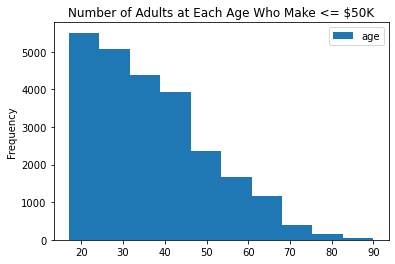

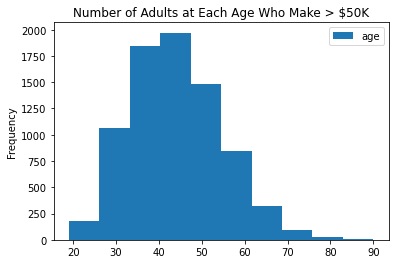

In [7]:
# Plot a histogram to see the distribution of ages of adults who make more and less than $50k.

age_inc = adults[['age', 'income']]

age_le50 = age_inc[age_inc['income'] == '<=50K'].sort_values(by='age', ascending=True)
age_le50.plot.hist(title="Number of Adults at Each Age Who Make <= $50K")

age_gt50 = age_inc[age_inc['income'] == '>50K'].sort_values(by='age', ascending=True)
age_gt50.plot.hist(title="Number of Adults at Each Age Who Make > $50K")

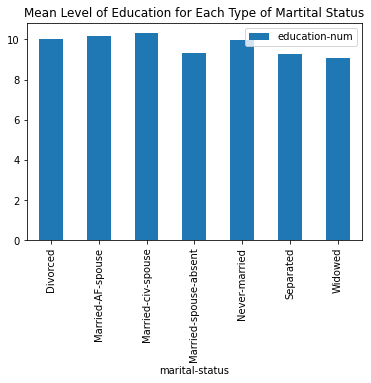

In [8]:
# Plot at least one bar plot that shows a trend within a variable that does not have inter-relationship.

edu_mar = adults[['marital-status', 'education-num']]
edu_mar = edu_mar[(edu_mar['education-num'] > 0)][['marital-status', 'education-num']].groupby('marital-status').mean()
edu_mar.plot.bar(title="Mean Level of Education for Each Type of Martital Status")

Plot at least one *line plot* that shows a trend, where the x-axis variable manifests fully across the plot domain.

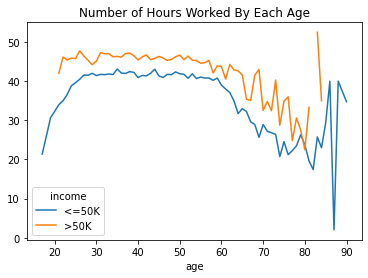

In [9]:
age_hours_inc = adults[['age','hours-per-week', 'income']].groupby(['income', 'age']).mean()
age_hours_inc = age_hours_inc.reset_index().pivot(index='age', columns='income', values='hours-per-week')
age_hours_inc.plot.line(title="Number of Hours Worked By Each Age")

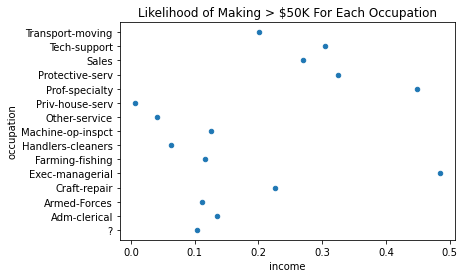

In [10]:
# Plot at least one scatter plot of the data that suggests a relationship between two discrete variables, 
# where the x-axis has an inter-related progression (amount, cost, process, etc.)
# but is not fully/evenly observed across the plot domain.

occ_inc = adults[['occupation', 'income']]
occ_gt50 = occ_inc[occ_inc['income'] == '>50K'].groupby('occupation').count()
occ_le50 = occ_inc[occ_inc['income'] == '<=50K'].groupby('occupation').count()

percent_gt50 = occ_gt50 / (occ_gt50 + occ_le50)
percent_gt50 = percent_gt50.reset_index()
percent_gt50 = percent_gt50.plot.scatter(x='income', y='occupation', title="Likelihood of Making > $50K For Each Occupation")
percent_gt50.xaxis.label.set_rotation(0)

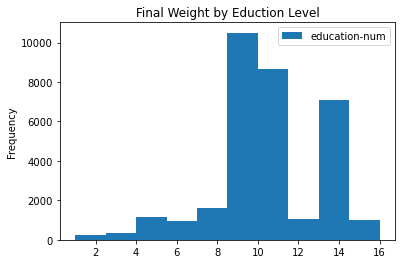

In [11]:
# Plot a histogram of a quantity that varies across the x-axis domain, 
# but where we would like to consider a general distribution, rather than individual observations.

edu_fnl = adults[['education-num', 'fnlwgt']]
edu_fnl.plot.hist(x='fnlwgt', y='education-num', title="Final Weight by Eduction Level")

It is important to think about the proportions of adults who make > $50K and <= $50K.
The results show that out of all adults, only 40% make more than $50K.
Of the 40% males make up 30% and females make up 10%.


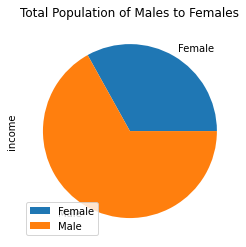

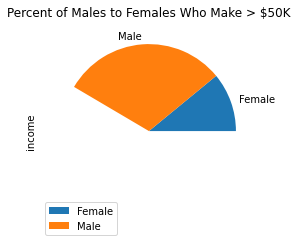

In [12]:
# What is the relationship between between gender and whether a person makes more than $50k?

sex_inc = adults[['sex', 'income']]

pop = sex_inc.groupby(['sex']).count()
pop.plot.pie(y='income', title="Total Population of Males to Females")

sex_gt50 = sex_inc[sex_inc['income'] == '>50K'].groupby(['sex']).count()
sex_le50 = sex_inc[sex_inc['income'] == '<=50K'].groupby(['sex']).count()

percent_gt50 = sex_gt50 / (sex_gt50 + sex_le50)
percent_gt50.plot.pie(y='income', title="Percent of Males to Females Who Make > $50K")

print("It is important to think about the proportions of adults who make > $50K and <= $50K.")
print("The results show that out of all adults, only 40% make more than $50K.")
print("Of the 40% males make up 30% and females make up 10%.")

All occupations where adults make > $50K seem to have more males than females.
This does not seem to remain true for adults who make <= $50K.
NOTE: Like the question above, keep in mind that there are signifactly more males than females in this data


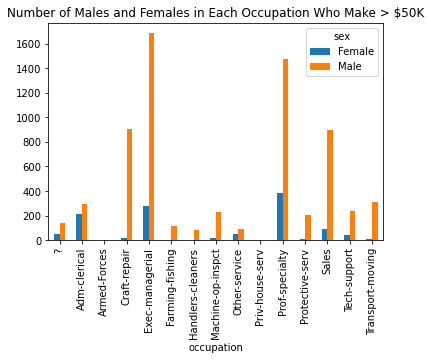

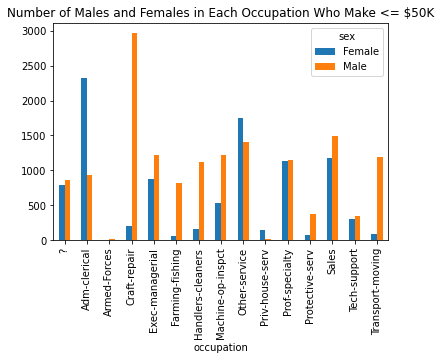

In [13]:
# When a person makes more than $50K, what is the relationship between gender and occupation? What about for less?

sex_occ_inc = adults[['sex','occupation', 'income']]

sex_occ_gt50 = sex_occ_inc[sex_occ_inc['income'] == '>50K'].groupby(['sex', 'occupation']).count()
sex_occ_gt50 = sex_occ_gt50.reset_index().pivot(index='occupation', columns='sex', values='income')
sex_occ_gt50.plot.bar(title="Number of Males and Females in Each Occupation Who Make > $50K")

sex_occ_le50 = sex_occ_inc[sex_occ_inc['income'] == '<=50K'].groupby(['sex', 'occupation']).count()
sex_occ_le50 = sex_occ_le50.reset_index().pivot(index='occupation', columns='sex', values='income')
sex_occ_le50.plot.bar(title="Number of Males and Females in Each Occupation Who Make <= $50K")

print("All occupations where adults make > $50K seem to have more males than females.")
print("This does not seem to remain true for adults who make <= $50K.")
print("NOTE: Like the question above, keep in mind that there are signifactly more males than females in this data")

Even thought this chart sucks, if you exclude the US you can see that Prof-Specialty is one of the richest proffesions in most countries.


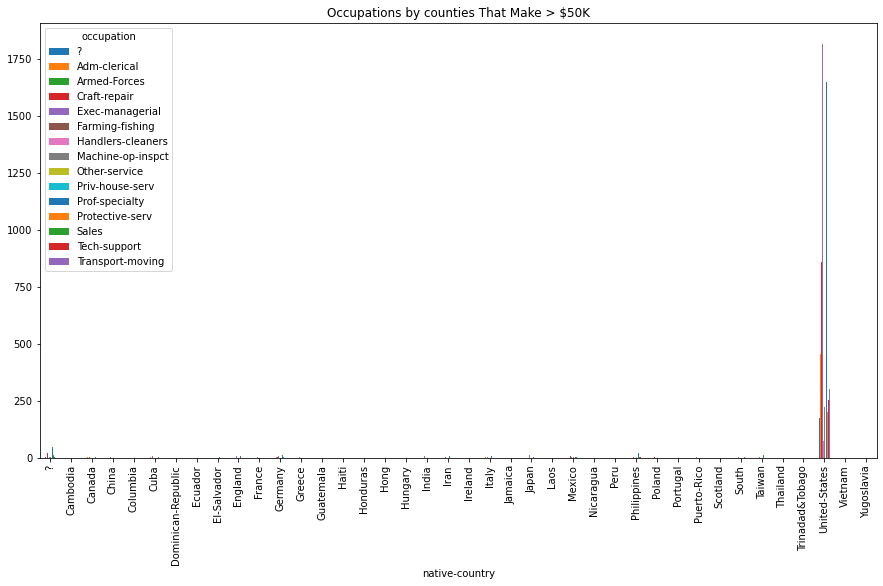

In [14]:
# Which are the “richest” professions in each possible native country?
axis = pl.figure(figsize=(15,8)).gca()
occ_nat_inc = adults[['occupation', 'native-country', 'income']]

occ_nat_gt50 = occ_nat_inc[(occ_nat_inc['income'] == '>50K')].groupby(['native-country','occupation']).count()
occ_nat_gt50 = occ_nat_gt50.reset_index().pivot(index='native-country', columns='occupation', values='income')
occ_nat_gt50.plot.bar(ax=axis, title="Occupations by counties That Make > $50K")

print("Even thought this chart sucks, if you exclude the US you can see that Prof-Specialty is one of the richest proffesions in most countries.")

Based on the mean level of education, asians and whites have a higher level of education compared to the rest.
When looking at mean education level for adults who make > $50K, there are similar results compared to the entire population.


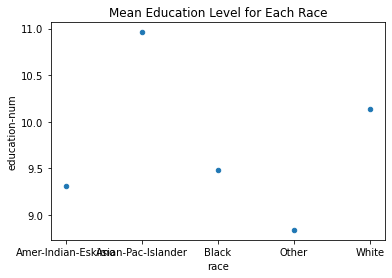

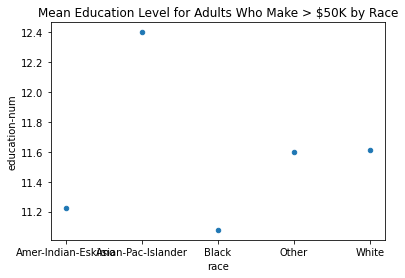

In [17]:
# What is the relationship between race and level of education? 
# Does it further seem to relate to whether a person makes more than $50k?

edu_race_inc = adults[['education-num', 'race', 'income']]

edu_race = edu_race_inc[(edu_race_inc['education-num'] > 0)][['education-num', 'race']].groupby('race').mean()
edu_race = edu_race.reset_index()
edu_race.plot.scatter(x='race', y='education-num', title="Mean Education Level for Each Race")


edu_race_gt50 = edu_race_inc[(edu_race_inc['income'] == ">50K")][['education-num', 'race']].groupby('race').mean()
edu_race_gt50 = edu_race_gt50.reset_index()
edu_race_gt50.plot.scatter(x='race', y='education-num', title="Mean Education Level for Adults Who Make > $50K by Race")

print("Based on the mean level of education, asians and whites have a higher level of education compared to the rest.")
print("When looking at mean education level for adults who make > $50K, there are similar results compared to the entire population.")